# DBSCAN Clustering using scikit-learn in Python

#### Necessary library imports

In [1]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

#### Make the data

In [2]:
# Generate random data
np.random.seed(0)  # for reproducibility
n_samples = 1000
data = np.random.randn(n_samples, 2) * 3 + 10

# Add some outliers
outliers = np.random.uniform(low=-15, high=15, size=(100, 2))
data = np.vstack([data, outliers])

#### Applying DBSCAN 

In [3]:
dbscan = DBSCAN(eps=1, min_samples=5)
labels = dbscan.fit_predict(data)

plt.figure(figsize=(8, 6))

# Core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)

<Figure size 800x600 with 0 Axes>

#### Defining colors and plotting

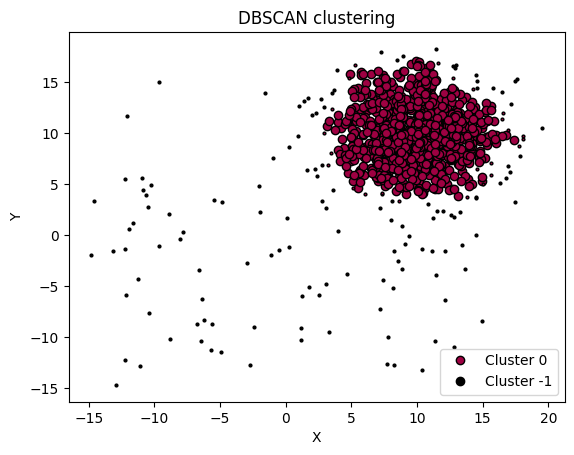

In [4]:
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6, label=f'Cluster {k}')

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=2)

plt.title('DBSCAN clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()